The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

In [11]:
# Lets import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [12]:
train = pd.read_csv(r'C:\Users\jyo14\.jupyter\train_v9rqX0R.csv')
test = pd.read_csv(r'C:\Users\jyo14\.jupyter\test_AbJTz2l.csv')

In [13]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


### EDA Steps

1. Univariate Analysis
2. Bivariate Analysis
3. Missing Values
4. Outlier Identification & Removal
5. Feature Engineeering
6. Statistical Tests
7. Scaling
8. Transformation

Remember that the Decision Trees, Random Forests, Gradient Boosting Machines are non parametric in nature and thus, there is no need to scale the data for these models.

In [14]:
 # Combine the Dataset
combined = pd.concat([train, test], ignore_index = True)
train.shape, test.shape, combined.shape

((8523, 12), (5681, 11), (14204, 12))

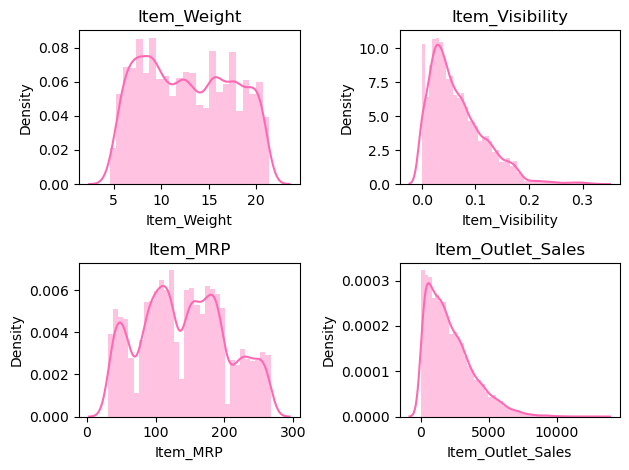

In [15]:
# Univariate Analysis ~ Numerical Columns
combined.select_dtypes(include = np.number).columns

num_cols = ['Item_Weight', 'Item_Visibility',
            'Item_MRP','Item_Outlet_Sales']

nrows = 2
ncols = 2
iterator = 1

for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.distplot(combined.loc[:, i], color = "hotpink")
    iterator+=1
    plt.title(i)
plt.tight_layout()
plt.show()

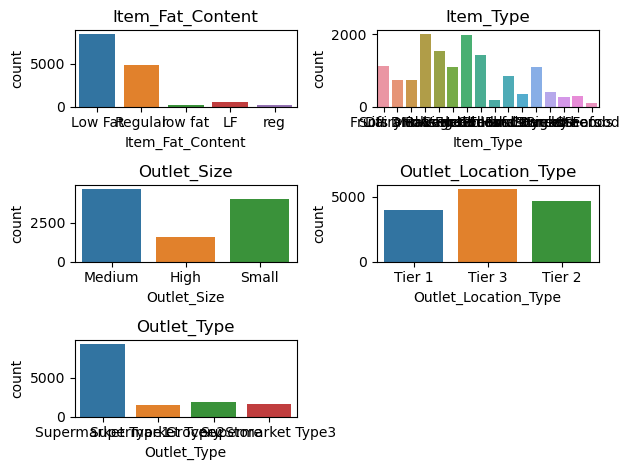

In [16]:
# Univariate Analysis - Categorical Variables...

combined.select_dtypes(include = "object").columns

# Item IDS, Outlet IDS and Out Est Year
cat_cols = ['Item_Fat_Content', 'Item_Type',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

nrows = 3
ncols = 2
iterator = 1

for i in cat_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.countplot(x=combined.loc[:, i])
    iterator+=1
    plt.title(i)

plt.tight_layout()
plt.show()

In [17]:
# Item Type
combined.loc[:, "Item_Type"].value_counts()[:5].index

Index(['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods',
       'Dairy'],
      dtype='object')

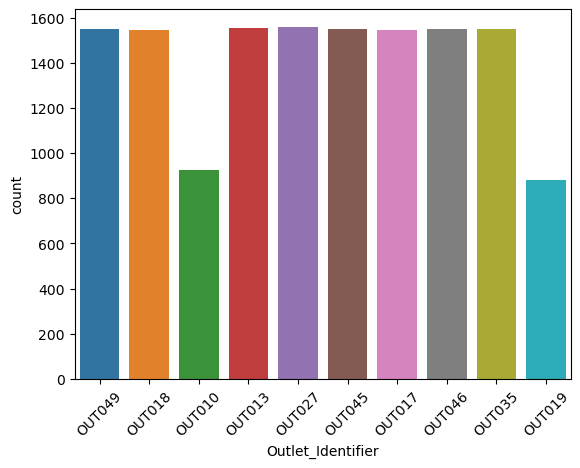

In [18]:
# Outlet Identifier
sns.countplot(x = combined.loc[:, "Outlet_Identifier"])
plt.xticks(rotation = 45)
plt.show()

### Inferences

1. Most of the Outlet Types are SuperMarket Type1

2. Most of the Products are Low Fat Products

3. Most of the Outlets are in Tier 3 Cities

4. Top 5 selling products are ['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods','Dairy']

5. The Top Outlets are 27 and 13 and the least visible outlets are OUT10 and OUT19.

In [19]:
#combined.loc[:, "Outlet_Identifier"].value_counts()

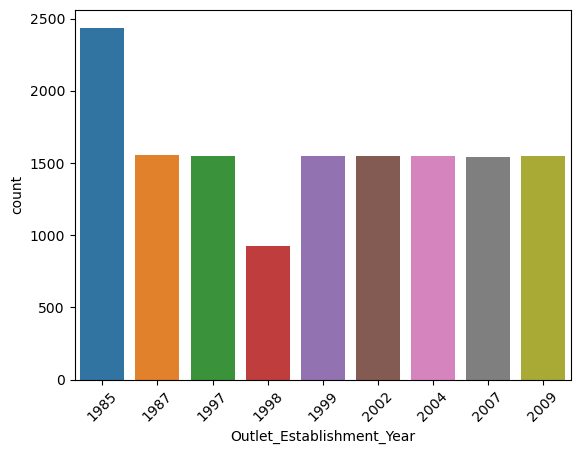

In [20]:
# Outlet Identifier
sns.countplot(x = combined.loc[:, "Outlet_Establishment_Year"])
plt.xticks(rotation = 45)
plt.show()

## Bivariate Analysis

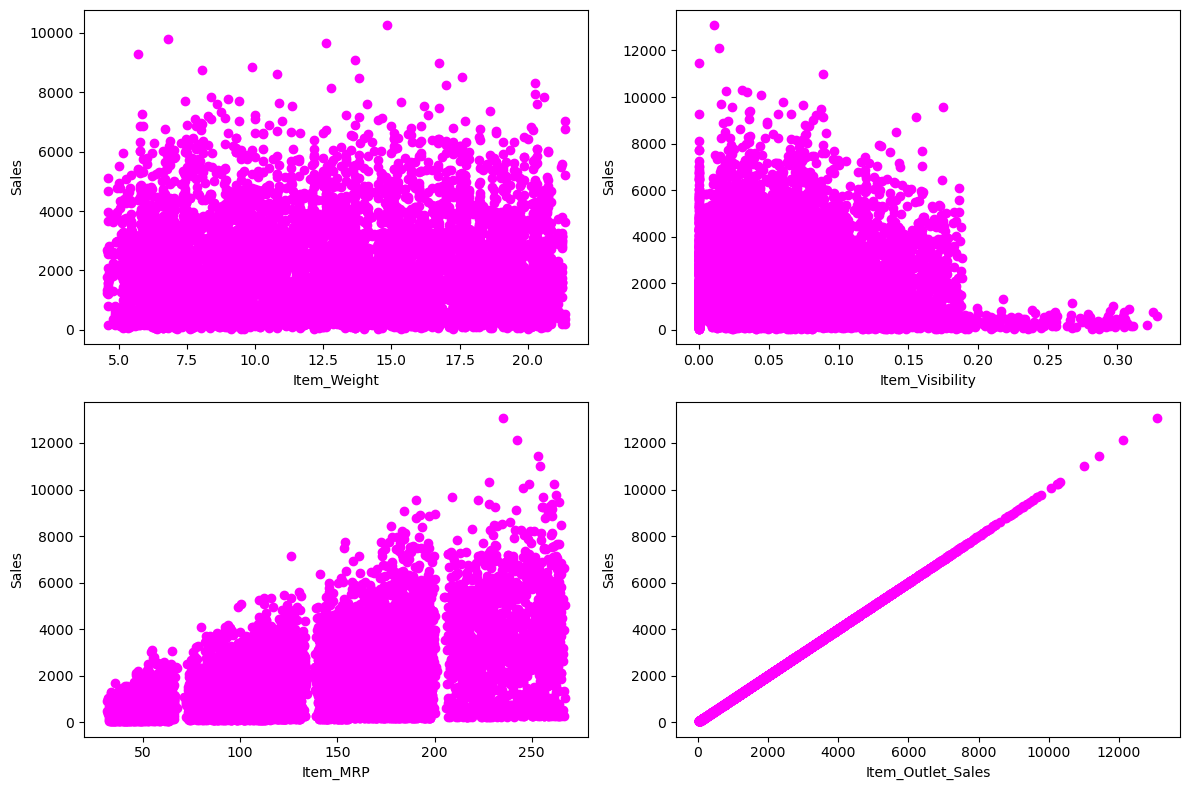

In [21]:
nrows = 2
ncols = 2
iterator = 1
plt.figure(figsize = [12, 8])
for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    plt.scatter(x = combined.loc[:, i],
                  y = combined.loc[:, "Item_Outlet_Sales"],
              color = "magenta")
    iterator+=1
    plt.xlabel(i)
    plt.ylabel("Sales")

plt.tight_layout()
plt.show()

### Missing Values

In [22]:
#combined.loc[combined.Item_Weight.isnull()].head(25)

In [23]:
combined.groupby("Item_Type")["Item_Weight"].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,900.0,12.275211,4.744906,4.880,8.300,11.650,15.75,20.85
Breads,343.0,11.152362,4.632099,4.635,6.710,10.500,14.80,20.85
Breakfast,152.0,13.179112,5.217283,6.425,8.060,11.600,18.60,21.10
Canned,898.0,12.340830,4.625382,4.615,8.115,12.150,16.50,21.35
Dairy,941.0,13.238358,4.662724,4.805,8.930,13.300,17.50,20.70
Frozen Foods,1175.0,12.569323,4.512750,4.555,8.895,12.300,16.20,20.85
Fruits and Vegetables,1667.0,13.194406,4.567869,5.460,8.985,13.100,17.00,21.35
Hard Drinks,303.0,11.576205,4.229816,4.610,8.365,10.195,15.00,19.70
Health and Hygiene,710.0,13.171739,4.551038,5.175,9.695,12.350,17.60,21.25


In [47]:
# Item Identifier
#combined.loc[combined.Item_Identifier=="DRI11", "Item_Weight"]

mapped = combined.groupby("Item_Identifier")\
 ["Item_Weight"].mean().to_dict()
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
item_ids                        0
Item_Type_Cat                   0
Outlet_ID_Type                  0
dtype: int64

In [25]:
# Code for dealing with the missing values
combined["Item_Weight"] = combined.groupby("Item_Identifier")\
 ["Item_Weight"].transform(lambda x:x.fillna(x.mean()))

In [26]:
# Code for dealing with the missing values
combined["Item_Visibility"] = combined.groupby("Item_Identifier")\
 ["Item_Visibility"].transform(lambda x:x.replace(0, x.mean()))

<Axes: xlabel='Item_Outlet_Sales'>

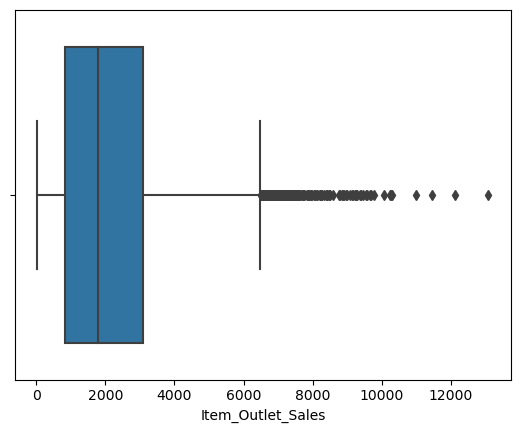

In [27]:
sns.boxplot(x =  "Item_Outlet_Sales", data = combined)

### Feature Engineering

In [28]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [29]:
# Extracting the First Two Letters from Item ID
combined.Item_Identifier[0][:2]

ids= []
for i in combined.Item_Identifier:
    ids.append(i[:2])

combined["item_ids"] = pd.Series(ids)

In [30]:
# Item Fat Content
combined.Item_Fat_Content.unique()

combined.Item_Fat_Content.replace(to_replace = ["low fat", "LF", "reg"],
                                  value = ["Low Fat", "Low Fat", "Regular"],
                                  inplace = True)

In [31]:
# Item Type
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [32]:
perish = ['Dairy','Meat', 'Fruits and Vegetables','Breakfast',
          'Breads', 'Starchy Foods','Seafood']

def perishables(x):
    if x in perish:
        return("Perishables")
    else:
        return("Non_Perishables")

combined["Item_Type_Cat"] = combined["Item_Type"].apply(perishables)

<Axes: xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

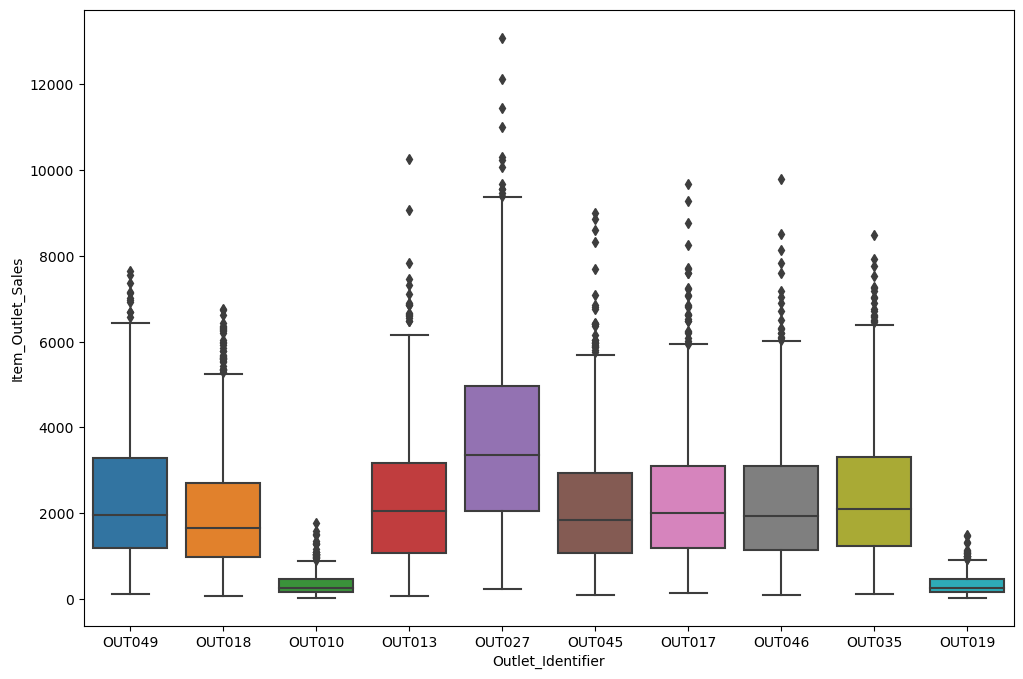

In [33]:
# Outlet ID vs Sales
plt.figure(figsize = (12, 8))
sns.boxplot(x = "Outlet_Identifier", y = "Item_Outlet_Sales",
            data = combined)

In [34]:
top = ["OUT027", "OUT013", "OUT046"]
worse = ["OUT010", "OUT019"]

def outlets(x):
    if x in top:
        return("Top_Perf")
    elif x in worse:
        return("Worse_Perf")
    else:
        return("Medium_Perf")

combined["Outlet_ID_Type"] = combined.Outlet_Identifier.apply(outlets)

In [35]:
# Missing Value in Outlet Size
combined.groupby(["Outlet_Identifier", "Outlet_Location_Type",
                  "Outlet_Type"])["Outlet_Size"].value_counts()

Outlet_Identifier  Outlet_Location_Type  Outlet_Type        Outlet_Size
OUT013             Tier 3                Supermarket Type1  High           1553
OUT018             Tier 3                Supermarket Type2  Medium         1546
OUT019             Tier 1                Grocery Store      Small           880
OUT027             Tier 3                Supermarket Type3  Medium         1559
OUT035             Tier 2                Supermarket Type1  Small          1550
OUT046             Tier 1                Supermarket Type1  Small          1550
OUT049             Tier 1                Supermarket Type1  Medium         1550
Name: Outlet_Size, dtype: int64

In [36]:
combined.loc[combined.Outlet_Size.isnull(), "Outlet_Location_Type"].unique()

array(['Tier 3', 'Tier 2'], dtype=object)

In [37]:
combined.loc[(combined.Outlet_Size.isnull()) & \
 (combined.Outlet_Type=="Grocery Store"), "Outlet_Size"]="Small"

In [38]:
combined.loc[(combined.Outlet_Size.isnull()) & \
 (combined.Outlet_Type=="Supermarket Type1") &\
             (combined.Outlet_Location_Type=="Tier 2"),
             "Outlet_Size"]="Small"

In [39]:
# Split the data in train and test
newtrain = combined.loc[0:train.shape[0]-1, :]
newtest = combined.loc[train.shape[0]:, :]

### Statistical Analysis

In [40]:
cols  =["Item_Weight", "Item_Visibility", "Item_MRP"]

#Ho: Predictors and Target Variable are Independent
#Ha: Predictors and target are Related.
import scipy.stats as stats
for i in cols:
      teststats, pvalue = stats.ttest_ind(newtrain.loc[:, i],
                                      newtrain.Item_Outlet_Sales)
      print("PValue for ", i, "is ", pvalue)

PValue for  Item_Weight is  0.0
PValue for  Item_Visibility is  0.0
PValue for  Item_MRP is  0.0


In [41]:
# Lets Cehck if Item IDS has any relation with Sales
# H0 : Item IDs and Sales are Independent
# Ha : Sales is Dependent on Item ID
# ONE WAY ANOVA : 1cat vs 1num
import statsmodels.formula.api as sfa
model=sfa.ols("Item_Outlet_Sales~item_ids",data = newtrain).fit()

In [42]:
# Anova Table
from statsmodels.stats.anova import anova_lm
print(anova_lm(model))
# Reject the H0 meaning that sales is dependent on Item Ids

              df        sum_sq       mean_sq         F    PR(>F)
item_ids     2.0  3.652405e+07  1.826203e+07  6.278766  0.001884
Residual  8520.0  2.478074e+10  2.908538e+06       NaN       NaN


In [43]:
import statsmodels.formula.api as sfa
model=sfa.ols("Item_Outlet_Sales~Item_Type",data = newtrain).fit()


In [44]:
# 2 WAY ANOVA : 2 or more cat vs 1 num
import statsmodels.formula.api as sfa
model=sfa.ols("Item_Outlet_Sales~Item_Type+Outlet_Identifier+Outlet_Type+Outlet_Size",data = newtrain).fit()
from statsmodels.stats.anova import anova_lm
print(anova_lm(model))

                       df        sum_sq       mean_sq           F    PR(>F)
Item_Type            15.0  1.176182e+08  7.841211e+06    3.556289  0.000004
Outlet_Identifier     9.0  5.962528e+09  6.625031e+08  300.470473  0.000000
Outlet_Type           3.0  5.467346e+06  1.822449e+06    0.826550  0.479019
Outlet_Size           2.0  5.140975e+06  2.570488e+06    1.165814  0.311719
Residual           8498.0  1.873712e+10  2.204886e+06         NaN       NaN


In [45]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     114.9
Date:                Wed, 19 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:59:05   Log-Likelihood:                -74325.
No. Observations:                8523   AIC:                         1.487e+05
Df Residuals:                    8498   BIC:                         1.489e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte